# Histograms, histogram equalization, histogram matching

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

## Histogram a CDF (Cumulative distribution function)

Histogram je grafické znázornění TODO

Pojďme si zkusit vytvořit jednoduchý obrázek 20x20 pixelu ve stupních šedi. Zkusit si vykreslit histogram a CDF.

In [4]:
img = np.random.rand(20,20) # matrix 20 x 20 náhodných čísel z intervalu [0,1)

In [5]:
BINS = 50 # počet přihrádek
hist, bins = np.histogram(img.flatten(), bins=BINS)
cdf = hist.cumsum()

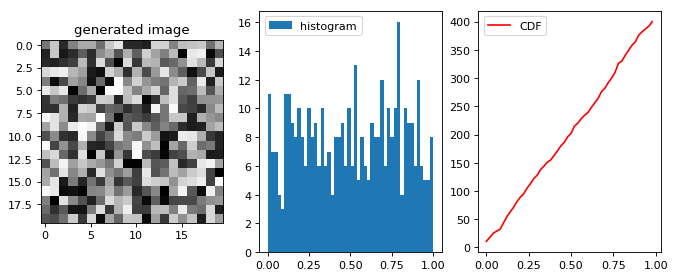

In [6]:
plt.figure(figsize=(10,4), dpi=80)

plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.title(("generated image"))

plt.subplot(132)
plt.hist(img.flatten(), bins=BINS, label="histogram")
plt.legend()

plt.subplot(133)
plt.plot(bins[:-1], hist.cumsum(), color="r", label="CDF")
plt.legend()

## Ekvalizace histogramu (Histogram equalization)

Naše vágní definice:
>Ekvalizace histogramu je metoda, která upravuje **kontrast** obrázku pomocí manipulace s jeho histogramem.

Náš algoritmický popis:
>Ekvalizace histogramu je funkce z originálního obrázku na nějaký transformovaný. To uděláme tak, že upravíme podle nějakého pravidla každý pixel originálního obrázku.


Příklad:
1. Nahrajeme obrázek z 'data/L.jpg'
2. Převedeme obrázek z barevného na stupně šedi
2. Vykreslíme histogram a CDF  (tentokrát ale CDF znormalizujeme)

In [7]:
img = cv.imread(os.path.join("data", "P.jpg"))
grayscaled = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [8]:
BINS = 50
hist, bins = np.histogram(grayscaled.flatten(), bins=BINS)
cdf = hist.cumsum()
cdf_normalized = cdf / len(grayscaled.flatten())

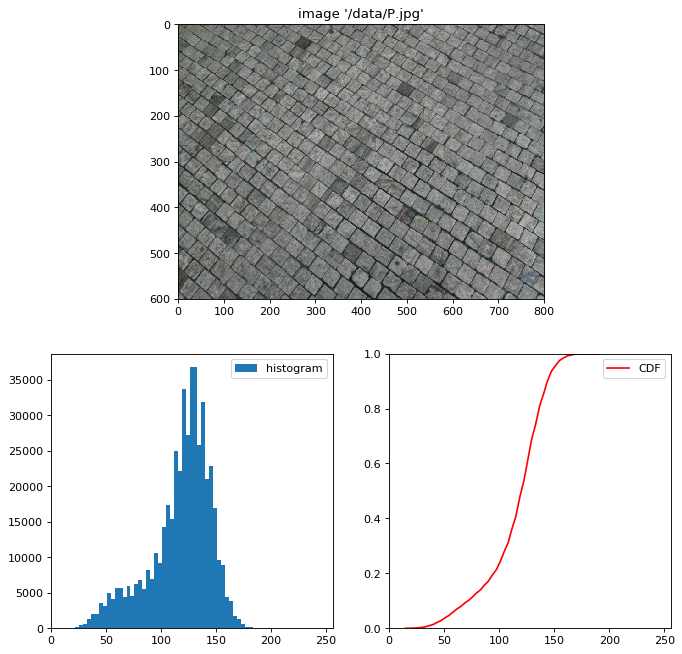

In [9]:
plt.figure(figsize=(10,10), dpi=80)

plt.subplot(211)
plt.imshow(img, cmap="gray")
plt.title(("image '/data/P.jpg'"))

plt.subplot(223)
plt.hist(grayscaled.flatten(), bins=50, label="histogram")
plt.xlim((0,256))
plt.legend()

plt.subplot(224)
plt.plot(bins[:-1], cdf_normalized, color="r", label="CDF")
plt.xlim((0,256))
plt.ylim((0,1))
plt.legend()

### Vylepšení obrazu roztažením rozsahu intenzity (Look up table)

Ukážeme si použití kouzelné funkce z knihovny opencv, vy za domácí úkol naprogramujete jednoduchý algoritmus LUT.

In [10]:
equ = cv.equalizeHist(grayscaled) # ekvalizuje grayscaled
hist_equ, bins_equ = np.histogram(equ, bins=50)
cdf_equ = hist_equ.cumsum()
cdf_normalized_equ = cdf_equ / len(equ.flatten())

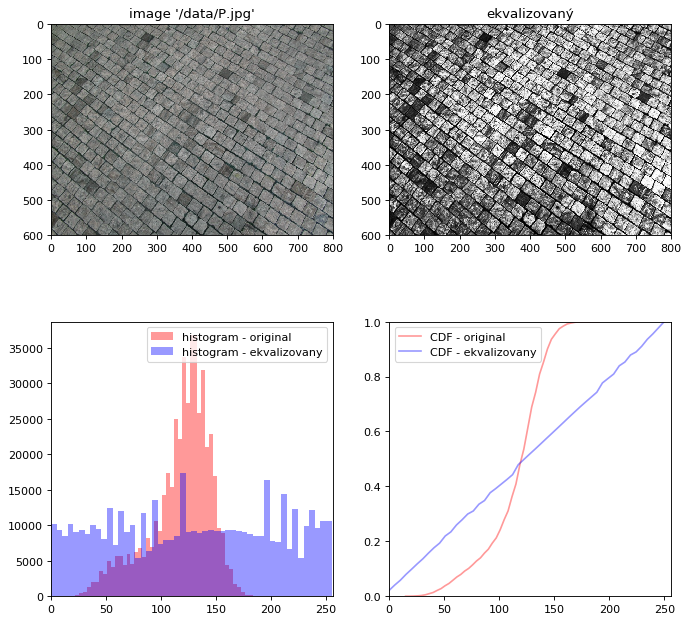

In [11]:
plt.figure(figsize=(10,10), dpi=80)

plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.title(("image '/data/P.jpg'"))

plt.subplot(222)
plt.imshow(equ, cmap="gray")
plt.title(("ekvalizovaný"))

plt.subplot(223)
plt.hist(grayscaled.flatten(), bins=50, alpha=0.4, color="r", label="histogram - original")
plt.hist(equ.flatten(), bins=50, alpha=0.4, color="b", label="histogram - ekvalizovany")
plt.xlim((0,256))
plt.legend()

plt.subplot(224)
plt.plot(bins[:-1], cdf_normalized, alpha=0.4, color="r", label="CDF - original")
plt.plot(bins_equ[:-1], cdf_normalized_equ, alpha=0.4, color="b", label="CDF - ekvalizovany")
plt.xlim((0,256))
plt.ylim((0,1))
plt.legend()

### Omezená ekvalizace histogramu (Restricted histogram equalisation)

Pojďme si zkusit použít *Look up table* z vašeho úkolu a tento algoritmus použít na další obrázek, kód vám neukážu, protože to máte za domácí úkol, ale výsledek by měl být podobný tomuto:

![example2](data/hw2_example.svg)

Náš naivní algoritmus LUT vede k tvorbě takzvaných *artefaktů*. Váš druhý domácí úkol bude vymyslet (případně nalézt v literatuře, na webu) a implementovat algoritmus, který se tento nešvar pokusí odstranit.

In [12]:
img = cv.imread(os.path.join("data", "L.jpg"))
grayscaled = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [13]:
BINS = 50
hist, bins = np.histogram(grayscaled.flatten(), bins=BINS)
cdf = hist.cumsum()
cdf_normalized = cdf / len(grayscaled.flatten())

In [14]:
equ = cv.equalizeHist(grayscaled)
hist_equ, bins_equ = np.histogram(equ, bins=BINS)
cdf_equ = hist_equ.cumsum()
cdf_normalized_equ = cdf_equ / len(equ.flatten())

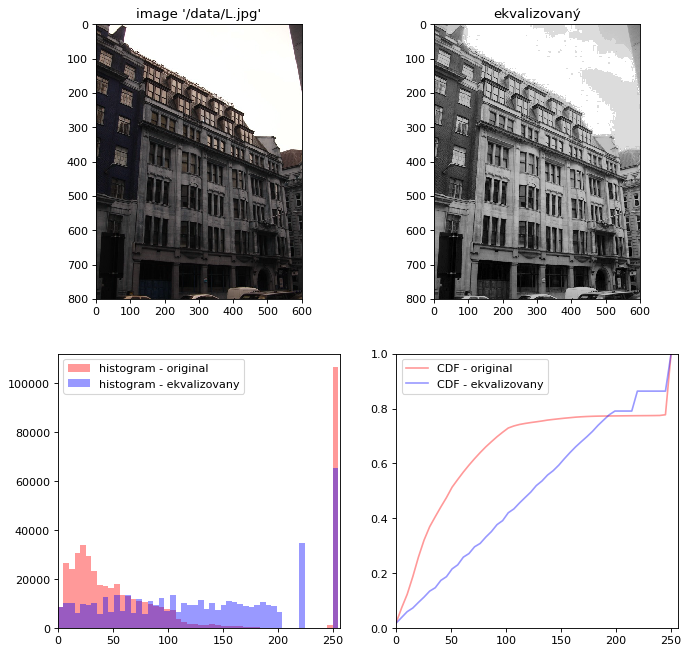

In [15]:
plt.figure(figsize=(10,10), dpi=80)

plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.title(("image '/data/L.jpg'"))

plt.subplot(222)
plt.imshow(equ, cmap="gray")
plt.title(("ekvalizovaný"))

plt.subplot(223)
plt.hist(grayscaled.flatten(), bins=50, alpha=0.4, color="r", label="histogram - original")
plt.hist(equ.flatten(), bins=50, alpha=0.4, color="b", label="histogram - ekvalizovany")
plt.xlim((0,256))
plt.legend()

plt.subplot(224)
plt.plot(bins[:-1], cdf_normalized, alpha=0.4, color="r", label="CDF - original")
plt.plot(bins_equ[:-1], cdf_normalized_equ, alpha=0.4, color="b", label="CDF - ekvalizovany")
plt.xlim((0,256))
plt.ylim((0,1))
plt.legend()

##  (Histogram matching)

In [16]:
def calculate_lookup(src_cdf, ref_cdf):
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table

In [17]:
image = cv.imread(os.path.join("data", "CM1.jpg"))
img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
reference = cv.imread(os.path.join("data", "CM2.jpg"))
ref = cv.cvtColor(reference, cv.COLOR_BGR2GRAY)

In [43]:
BINS = 256
hist, bins = np.histogram(img.flatten(), bins=BINS)
cdf = hist.cumsum()
cdf_normalized = cdf / len(img.flatten())
hist_r, bins_r = np.histogram(ref.flatten(), bins=BINS)
cdf_r = hist_r.cumsum()
cdf_normalized_r = cdf_r / len(ref.flatten())

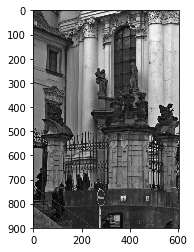

In [38]:


plt.imshow(ref, cmap="gray")

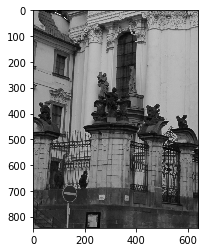

In [39]:
plt.imshow(img, cmap="gray")

In [45]:
lut = calculate_lookup(cdf_normalized, cdf_normalized_r)

In [47]:
transformed = cv.LUT(img, lut)

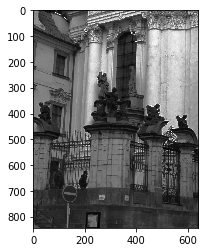

In [50]:
plt.imshow(transformed, cmap="gray")

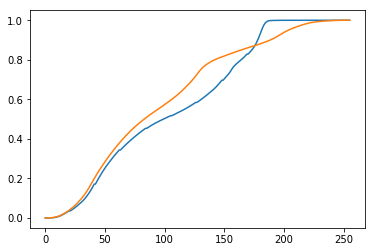

In [63]:
#plt.plot(lut/255.)
plt.plot(cdf_normalized)
plt.plot(cdf_normalized_r)

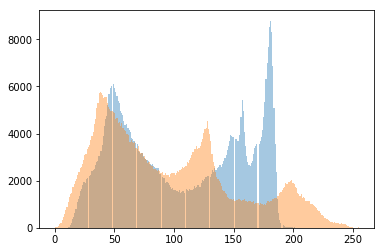

In [64]:
plt.hist(img.flatten(), alpha=0.4, bins=256)
plt.hist(ref.flatten(), alpha=0.4, bins=256)
plt.hist(transformed.flatten(), alpha=0.4, bins=256)
pass